# Analysis of UofT Course Evaluations
## Introduction
The University of Toronto conducts course evalutations every semester. The data is available to view on the student portal but there is no easy way to export it. This dataset is from another github project [https://github.com/EKarton/UofT-Future-Course-Evaluations]. I checked the data against the website and it seemed accurate, although I cannot verify if it is complete or not.  
Each row of data describes a single course section and the mean of student responses to a series of questions. Students rate how much they agree with the statements on a scale of 1 to 5. This format means student responses are anonymous. The data is recorded to 1 decimal place
    Below are the set of questions students would rate.

In [2]:
import pandas
import matplotlib.pyplot as plt
df = pandas.read_csv("raw-data.csv")
short = ['s1', 's2', 's3', 's4', 's5', 's6','s7','s8','s9']
long = df.columns[7:16]
reference = {short:long for short, long in zip(short,long)}
new_cols = list(df.columns)
new_cols[7:16] = short
df.columns = new_cols
reference

{'s1': 'Item 1. I found the course intellectually stimulating.',
 's2': 'Item 2. The course provided me with a deeper understanding of the subject matter.',
 's3': 'Item 3. The instructor created a course atmosphere that was conducive to my learning.',
 's4': 'Item 4. Course projects, assignments, tests and/or exams improved my understanding of the course material.',
 's5': 'Item 5. Course projects, assignments, tests and/or exams provided opportunity for me to demonstrate an understanding of the course material.',
 's6': 'Item 6. Overall, the quality of my learning experience in this course was:',
 's7': 'Instructor generated enthusiasm',
 's8': 'Course Workload',
 's9': 'I would recommend this course'}

First, we just graph each column to get a feel for the data. 

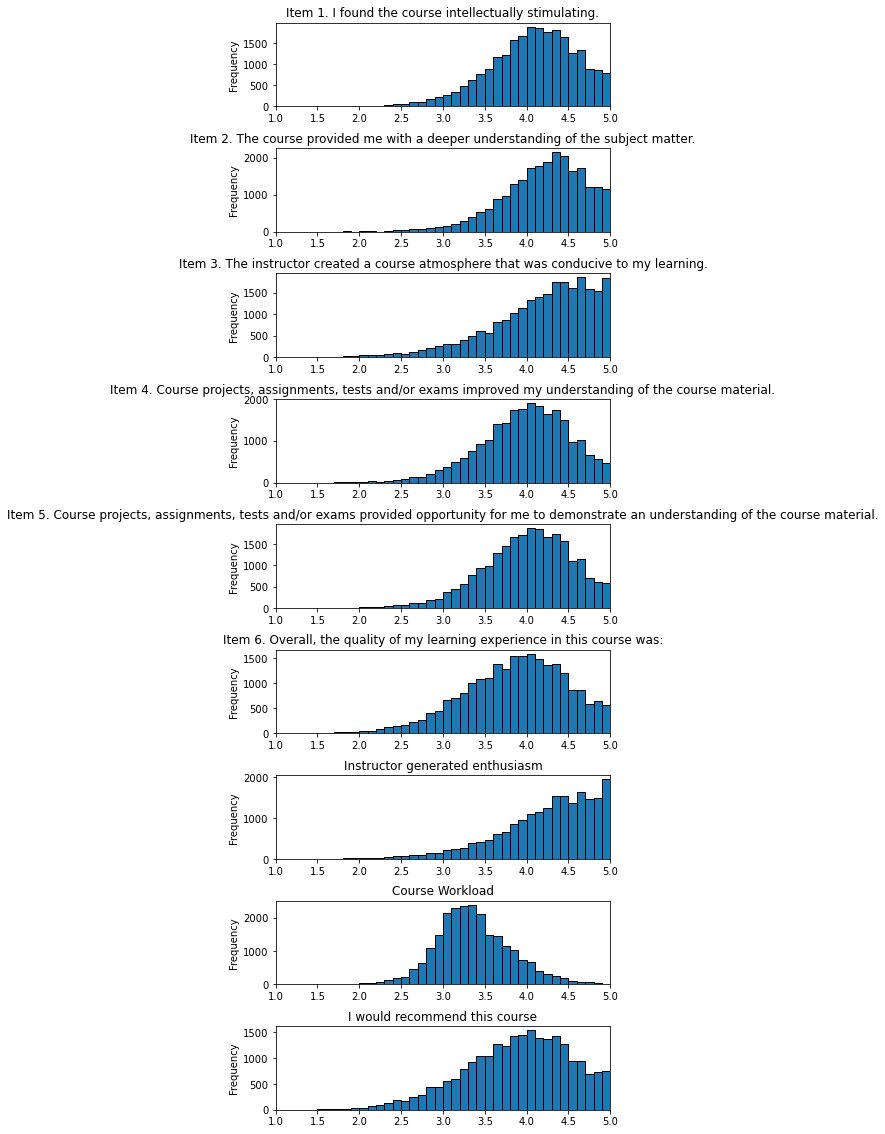

In [38]:
fig, axes = plt.subplots(nrows=9, ncols=1)
plt.subplots_adjust(hspace=0.5)
bin_edges = [x/10 for x in range(10, 51)]
for i, attribute in enumerate(short):
    df[attribute].plot(title=reference[attribute],kind='hist',
                       bins=bin_edges, ax=axes[i],figsize=(6,20), xlim = (1,5),edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

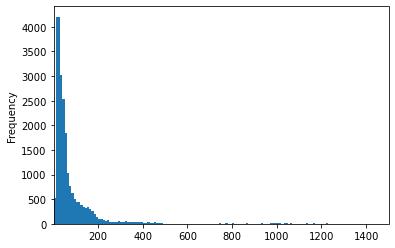

In [37]:
bins = list(range(0, 1510, 10))
df['Number of Students Invited'].plot(kind='hist',bins=bins, xlim=(1,1500))

Lets plot the course workload by departments. CS looks to have harder courses in general. Priors=Confirmed

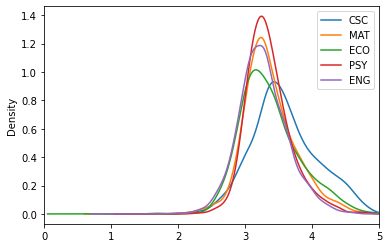

In [65]:
depts = ['CSC', 'MAT', 'ECO', 'PSY','ENG']
fig, ax = plt.subplots()
for dept in depts:
    dept_filter = df['Dept']==dept
    df[dept_filter]['s8'].plot(kind='density', xlim=(0,5), ax=ax)
ax.legend(depts)

I'll also plot the parameters as a time series. It looks like there's a slight improvement in some of the questions, especially q6: quality of learning experience.

<AxesSubplot:xlabel='Year'>

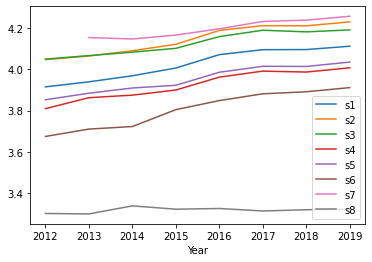

In [8]:
params = ['s1', 's2', 's3', 's4', 's5', 's6','s7','s8']
time_series = df.groupby('Year')[params].mean()
time_series.plot()

In [ ]:
def graph(df, param, filters, kind='density'):
    fig, ax = plt.subplots()
    for filter in filters:
        df[filter][param].plot(kind=kind, xlim=(1,5), ax=ax)